In [60]:
# load manipilation_library
import sys
sys.path.append('./manipulation_library.py') # add the path of manipulation_library.py
from manipulation_library import *

In [49]:
def get_center(bbox):
    """
    Calculate the center of a bounding box.
    bbox: [x_min, y_min, x_max, y_max]
    """
    x_center = (bbox[0] + bbox[2]) / 2
    y_center = (bbox[1] + bbox[3]) / 2
    return np.array([x_center, y_center])

def euclidean_distance(point1, point2):
    """
    Calculate the Euclidean distance between two points.
    """
    return np.linalg.norm(point1 - point2)

def find_close_bounding_boxes(ocr_bboxes, seg_bboxes, threshold):
    """
    Find OCR bounding boxes that are close to segmentation bounding boxes.
    ocr_bboxes: List of OCR bounding boxes
    seg_bboxes: List of segmentation bounding boxes
    threshold: Distance threshold to consider bounding boxes as close
    """
    close_bboxes = []
    close_bboxes_indices = []
    for idx_ocr, ocr_bbox in enumerate(ocr_bboxes):
        ocr_center = get_center(ocr_bbox)
        for idx, seg_bbox in enumerate(seg_bboxes):
            seg_center = get_center(seg_bbox)
            distance = euclidean_distance(ocr_center, seg_center)
            if distance <= threshold and ocr_bbox[1] < seg_bbox[1]:
                close_bboxes.append((ocr_bbox, seg_bbox))
                close_bboxes_indices.append((idx, idx_ocr))
    return close_bboxes, close_bboxes_indices


In [3]:

# # Example usage
# ocr_bboxes = [[10, 20, 50, 60], [100, 120, 150, 160]]  # Replace with actual OCR bounding boxes
# seg_bboxes = [[12, 22, 52, 62], [200, 220, 250, 260]]  # Replace with actual segmentation bounding boxes
# threshold = 10  # Define your threshold distance

# close_bboxes = find_close_bounding_boxes(ocr_bboxes, seg_bboxes, threshold)
# print(close_bboxes)

In [4]:
main_path = '/home/barradd/Documents/GitHub/CoralSCOP/data/raw/Exp8-CBS-080724'
path_to_coral = f'{main_path}/TL8_2799.jpg'
image = get_image(path_to_coral)
image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE, image)

In [5]:
reader = easyocr.Reader(['en'],gpu=True) # this needs to run only once to load the model into memory

In [6]:
result = reader.readtext(image)
ocr_bboxes, text_list = OcrAnalysis.get_bounding_boxes(result)

In [7]:
mask_generator = load_sam_model(model_type="vit_b")
masks = mask_generator.generate(image=image)
# list_of_images , titles , image_dataframe = process_images_and_sort_by_coordinates(image = image, masks= masks)


CUDA is available!
loading from ../checkpoints/vit_b_coralscop.pth


/home/barradd/Documents/GitHub/CoralSCOP/notebooks/../segment_anything/build_sam.py:113: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


In [34]:
seg_bboxes = [    ]
for i in range(len(masks)):
    x, y, width, height = masks[i]['bbox']
    seg_bboxes.append ( np.array([x, y, x+width, y+height]) ) 

In [35]:
ocr_bboxes[0:3]

[array([ 38,  40, 100,  68]),
 array([202,  30, 268,  58]),
 array([352,  28, 420,  54])]

In [36]:
seg_bboxes[0:3]

[array([346., 764., 412., 853.]),
 array([ 359.,  980.,  418., 1078.]),
 array([499., 764., 600., 869.])]

In [17]:
threshold = 50  # Define your threshold distance

In [18]:
close_bboxes = find_close_bounding_boxes(ocr_bboxes, seg_bboxes, threshold)

In [52]:
print(close_bboxes)

[(array([ 38,  40, 100,  68]), array([ 51.,  84., 129., 228.])), (array([202,  30, 268,  58]), array([211.,  75., 279., 194.])), (array([352,  28, 420,  54]), array([349.,  78., 441., 173.])), (array([510,  28, 582,  54]), array([515.,  76., 579., 172.])), (array([658,  28, 739,  64]), array([661.,  86., 716., 233.])), (array([ 32, 257,  95, 288]), array([ 61., 306., 160., 410.])), (array([200, 272, 276, 298]), array([189., 313., 292., 443.])), (array([354, 270, 422, 296]), array([349., 311., 437., 425.])), (array([654, 268, 716, 296]), array([653., 304., 726., 381.])), (array([ 53, 507, 130, 537]), array([ 57., 535., 114., 608.])), (array([196, 502, 266, 530]), array([199., 531., 289., 656.])), (array([348, 494, 426, 524]), array([349., 528., 424., 626.])), (array([506, 496, 592, 528]), array([504., 532., 596., 656.])), (array([506, 496, 592, 528]), array([515., 527., 588., 543.])), (array([658, 502, 732, 530]), array([627., 535., 706., 637.])), (array([ 40, 716, 112, 742]), array([ 5

In [20]:
len(close_bboxes)

8

In [50]:
for i in range(100,150,5):
    threshold = i
    close_bboxes ,close_bboxes_indices = find_close_bounding_boxes(ocr_bboxes, seg_bboxes, threshold)
    print(f'{threshold} : {len(close_bboxes)} , {close_bboxes_indices}')

100 : 23 , [(21, 1), (9, 2), (13, 3), (22, 5), (20, 6), (10, 7), (8, 8), (17, 9), (16, 10), (4, 11), (7, 12), (24, 12), (6, 13), (25, 14), (18, 15), (0, 16), (2, 17), (3, 18), (15, 19), (14, 20), (1, 21), (23, 22), (5, 23)]
105 : 24 , [(19, 0), (21, 1), (9, 2), (13, 3), (22, 5), (20, 6), (10, 7), (8, 8), (17, 9), (16, 10), (4, 11), (7, 12), (24, 12), (6, 13), (25, 14), (18, 15), (0, 16), (2, 17), (3, 18), (15, 19), (14, 20), (1, 21), (23, 22), (5, 23)]
110 : 24 , [(19, 0), (21, 1), (9, 2), (13, 3), (22, 5), (20, 6), (10, 7), (8, 8), (17, 9), (16, 10), (4, 11), (7, 12), (24, 12), (6, 13), (25, 14), (18, 15), (0, 16), (2, 17), (3, 18), (15, 19), (14, 20), (1, 21), (23, 22), (5, 23)]
115 : 25 , [(19, 0), (21, 1), (9, 2), (13, 3), (12, 4), (22, 5), (20, 6), (10, 7), (8, 8), (17, 9), (16, 10), (4, 11), (7, 12), (24, 12), (6, 13), (25, 14), (18, 15), (0, 16), (2, 17), (3, 18), (15, 19), (14, 20), (1, 21), (23, 22), (5, 23)]
120 : 25 , [(19, 0), (21, 1), (9, 2), (13, 3), (12, 4), (22, 5), (20

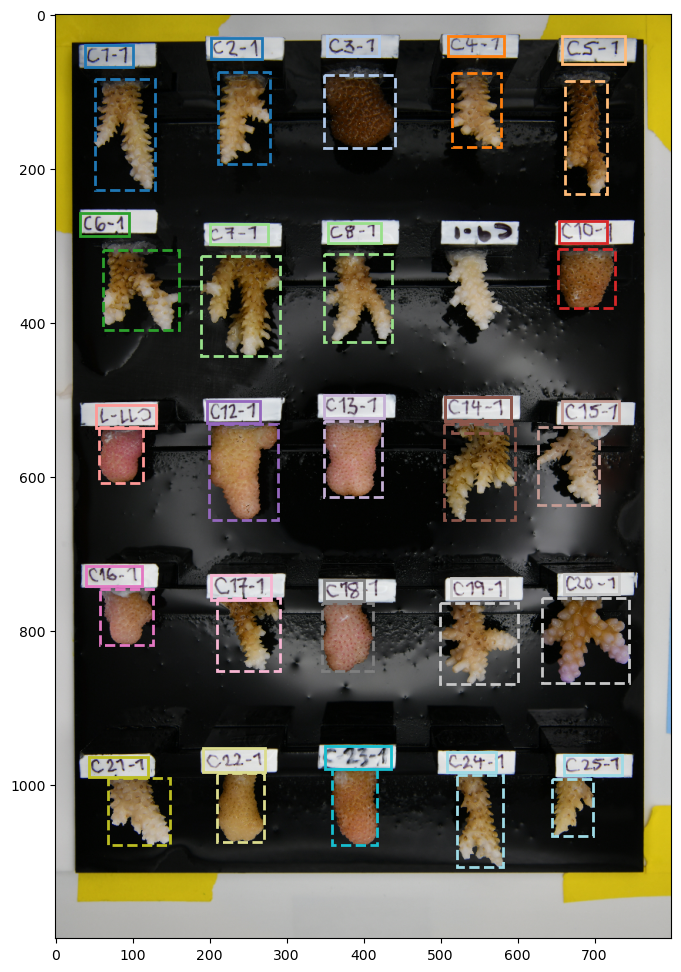

In [54]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Set the threshold
threshold = 125

# Find close bounding boxes with the new threshold
close_bboxes, close_bboxes_indices = find_close_bounding_boxes(ocr_bboxes, seg_bboxes, threshold)

# Create a figure and axis
fig, ax = plt.subplots(1, figsize=(12, 12))

# Display the image
ax.imshow(image)

# Define colors for bounding boxes
colors = plt.get_cmap('tab20', len(close_bboxes))

# Plot OCR and segmentation bounding boxes
for idx, (ocr_bbox, seg_bbox) in enumerate(close_bboxes):
    color = colors(idx)
    
    # OCR bounding box
    rect_ocr = patches.Rectangle((ocr_bbox[0], ocr_bbox[1]), ocr_bbox[2] - ocr_bbox[0], ocr_bbox[3] - ocr_bbox[1], linewidth=2, edgecolor=color, facecolor='none', label=f'OCR {idx}')
    ax.add_patch(rect_ocr)
    
    # Segmentation bounding box
    rect_seg = patches.Rectangle((seg_bbox[0], seg_bbox[1]), seg_bbox[2] - seg_bbox[0], seg_bbox[3] - seg_bbox[1], linewidth=2, edgecolor=color, facecolor='none', linestyle='dashed', label=f'Seg {idx}')
    ax.add_patch(rect_seg)

# Add legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
# ax.legend(by_label.values(), by_label.keys())

# Show the plot
plt.show()

In [55]:
# sort masks in the same order as close_bboxes 
sorted_masks = []
for idx, _ in close_bboxes_indices:
    sorted_masks.append(masks[idx])



In [61]:
def background_to_black ( image, index , masks  ):
    # Apply the mask to the image
    masked_img = image.copy()
    masked_pixels = masked_img[masks[index]['segmentation']==True]
    masked_img[masks[index]['segmentation']==False] = (0, 0, 0)  # Set masked pixels to black
    return masked_img ,masked_pixels


def use_sorted_mask(image, masks):
    cropped_image_list = []
    for i in range(len(masks)):
        x, y, width, height = masks[i]['bbox']
        image_b, masked_pixels = background_to_black(image=image, index=i , masks=masks)
        cropped_image = image_b[int(y):int(y+height), int(x):int(x+width)]
        cropped_image_list.append(cropped_image)

    return cropped_image_list

In [64]:
def process_images_and_use_sorted_mask(image, masks):
    cropped_image_list  = use_sorted_mask( image=image , masks=masks )
    return cropped_image_list

In [65]:
cropped_image_list = process_images_and_use_sorted_mask(image, sorted_masks)

In [69]:
# now lets output the images to ../data/interrim/Exp8-CBS-080724 , 
# the name of the image will be the same as the original image with the index of the sorted_masks appended to it
# the name also must include the number of the ocr bounding box that is close to the segmentation bounding box
# the image will be saved as a jpg file
for idx, image_segment in enumerate( cropped_image_list) :
    index_segmetation , index_ocr = close_bboxes_indices[idx]
    pred_text = text_list[index_ocr]
    image_segment = cv2.cvtColor(image_segment, cv2.COLOR_BGR2RGB)
    cv2.imwrite(f'../data/interim/image_index_{index_ocr}_{index_segmetation}_tag_{pred_text}.jpg',image_segment)